# Assignment 2

This assignment serves as a comprehensive evaluation of your machine learning skills, encompassing not only the technical aspects of model development but also your ability to analyze, interpret, and present data insights effectively. As such, it's essential to ensure that your submission is complete, functional, and devoid of any obvious gaps, as if you were delivering this project to a client.

To achieve this, leverage the full capabilities of Markdown and the interactive visualization tools available in Jupyter notebooks to craft a well-structured and visually appealing report of your findings. Your report should clearly communicate the insights you've gained from the exploratory data analysis, the rationale behind your data preprocessing and feature engineering decisions, and a thorough analysis of feature importance. High-quality visualizations and well-organized documentation will not only support your analysis but also make your results more accessible and understandable to your audience.

Remember, the ability to present complex results in an intuitive and engaging manner is a crucial skill, almost as important as the technical proficiency in model building and data analysis. Treat this assignment as an opportunity to showcase your skills in both areas.

## Instructions
- Your submission should be a `.ipynb` file with your name,
  like `FirstnameLastname.ipynb`. It should include the answers to the questions in markdown cells, your data analysis and results.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it by adding the source of the code as a comment in the first line of the code cell. [Academic misconduct policy](https://wiki.innopolis.university/display/DOE/Academic+misconduct+policy)
- In real life clients can give unclear goals or requirements. So, if the instructions seem vague, use common sense to make reasonable assumptions and decisions.

## Self-Reliance and Exploration
In this task, you're encouraged to rely on your resourcefulness and creativity. Dive into available resources, experiment with various solutions, and learn from every outcome. While our team is here to clarify task details and offer conceptual guidance, we encourage you to first seek answers independently. This approach is vital for developing your problem-solving skills in machine learning.



# Task 2: Image Classification with CNNs (50%)

In this task, you'll dive into the world of Convolutional Neural Networks (CNNs) by working with the CIFAR-10 dataset, a staple in image classification challenges. Your goal is to build and evaluate two different CNN models to classify images into one of the ten categories accurately.

The dataset is availabel in pytorch and keras.

## Part 1: Custom CNN Model (20%)

- Design and train a CNN model from scratch tailored for the CIFAR-10 dataset.
- Focus on the architecture that you believe will perform best for this specific task.
- Integrate various techniques such as batch normalization, dropout, learning rate schedulers, and early stopping to improve model training. Experiment with these methods and finetune them to see how they affect training stability, convergence speed, and overall performance.

## Part 2: Transfer Learning Model (20%)

- Implement a transfer learning approach using a pre-trained model of your choice.
- Fine-tune the model on the CIFAR-10 dataset to achieve the best possible performance.

## Evaluation (10%)

Ensure that both models are robust and generalized well to unseen data.

After training both models, you will evaluate them on a provided test dataset.

Compare your models based on:
- **AUC-ROC**: How well does each model discriminate between classes?
- **Model Size**: Consider the trade-offs in model complexity.
- **Inference Speed**: Evaluate how quickly your model can predict classes for new images.

Reflect on the performance, size, and inference speed of both models. What insights can you draw from these comparisons?

### Learning Objectives

- Understand and apply CNNs for image classification.
- Explore the impact of model architecture on performance and efficiency.
- Learn the process and benefits of transfer learning in deep learning.

Remember, the key to this task is not just about achieving the highest accuracy but also understanding the strengths and limitations of different approaches in machine learning model development.

## Name: Evgeny Bobkunov


## Mail: e.bobkunov@innopolis.university


## Group: SD-03

# Part 1: Custom CNN Model

### Load the CIFAR-10 dataset

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import os

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Normalize the pixel values to be between 0 and 1

In [2]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### One-hot encode the labels

In [3]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Split the training data into training and validation sets

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

### Define the CNN model

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

c:\Users\eugen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Compile the model

In [6]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

### Define the callbacks

In [7]:
checkpoint = ModelCheckpoint( 'cnn_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5, mode='max')

### Define the data augmentation

In [8]:
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

### Train the model

In [9]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), validation_data=(x_val, y_val), epochs=100, callbacks=[checkpoint, early_stopping, reduce_lr])

Epoch 1/100


c:\Users\eugen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 150ms/step - accuracy: 0.2926 - loss: 2.2494 - val_accuracy: 0.5412 - val_loss: 1.2602 - learning_rate: 0.0010
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 93s 149ms/step - accuracy: 0.5010 - loss: 1.3757 - val_accuracy: 0.5587 - val_loss: 1.3107 - learning_rate: 0.0010
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 95s 151ms/step - accuracy: 0.5971 - loss: 1.1402 - val_accuracy: 0.5908 - val_loss: 1.3007 - learning_rate: 0.0010
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 92s 147ms/step - accuracy: 0.6360 - loss: 1.0360 - val_accuracy: 0.6381 - val_loss: 1.0310 - learning_rate: 0.0010
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 92s 147ms/step - accuracy: 0.6748 - loss: 0.9284 - val_accuracy: 0.6864 - val_loss: 0.9015 - learning_rate: 0.0010
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 93s 148ms/step - accuracy: 0.6935 - loss: 0.8835 - val_accuracy: 0.7207 - val_loss: 0.8018 - learning_rate: 0.0010
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 92s 147ms/step - accuracy: 0.7136 

In [10]:
# Save model
model.save('cnn_model_bob.keras')
model.save('cnn_model_bob.h5')

# Save history
np.save('history_bob.npy', history.history)


In [11]:
# Load model
# model = load_model('cnn_model_bob.keras')

# Load history
# history = np.load('history_bob.npy', allow_pickle='TRUE').item()

### Evaluate the model

In [12]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8569 - loss: 0.4433
Test loss: 0.43891093134880066
Test accuracy: 0.8569999933242798


### Make predictions

In [13]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1000
           1       0.93      0.95      0.94      1000
           2       0.86      0.78      0.82      1000
           3       0.83      0.64      0.72      1000
           4       0.84      0.85      0.84      1000
           5       0.86      0.74      0.79      1000
           6       0.73      0.97      0.83      1000
           7       0.89      0.91      0.90      1000
           8       0.92      0.92      0.92      1000
           9       0.87      0.95      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



### The confusion matrix

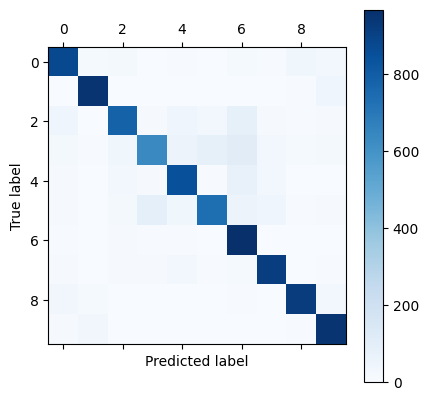

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


### The training history

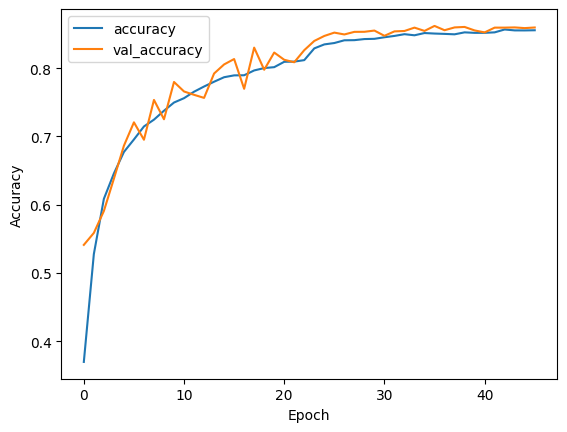

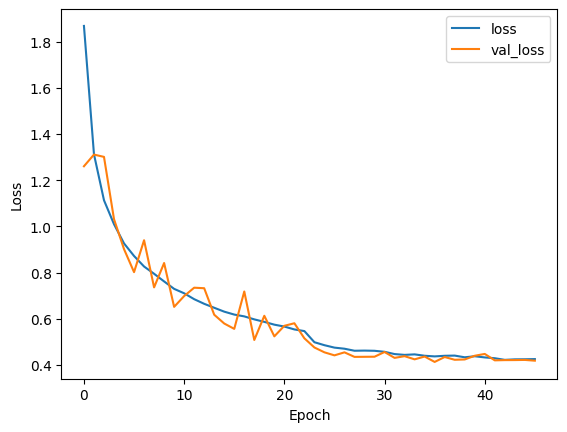

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import roc_auc_score

y_pred = model.predict(x_test)
cnn_roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


In [17]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
              precision    recall  f1-score   support

           0       0.82      0.66      0.73       939
           1       0.94      0.75      0.84      1018
           2       0.74      0.56      0.64       984
           3       0.66      0.43      0.53      1001
           4       0.67      0.68      0.68      1009
           5       0.82      0.46      0.59      1022
           6       0.34      0.90      0.50      1000
           7       0.87      0.68      0.77       981
           8       0.84      0.78      0.81       984
           9       0.77      0.82      0.79      1018

    accuracy                           0.67      9956
   macro avg       0.75      0.67      0.69      9956
weighted avg       0.75      0.67      0.69      9956



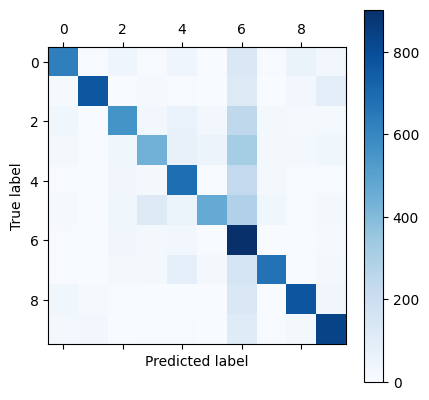

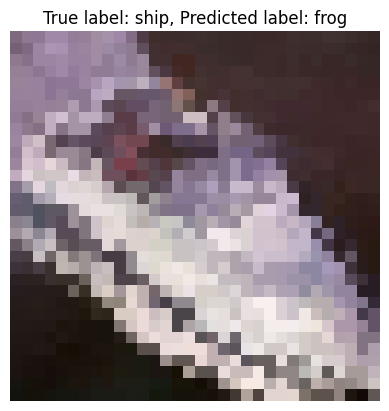

In [18]:
# Use trained model on task_2_test_images.npy and task_2_test_labels.npy

# Load the test images and labels
test_images = np.load('task_2_test_images.npy')
test_labels = np.load('task_2_test_labels.npy')

# Normalize the pixel values to be between 0 and 1
test_images = test_images / 255.0

# Make predictions
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(test_labels, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(test_labels, y_pred)
plt.matshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Print pictures with wrong predictions
wrong_predictions = np.where(y_pred != test_labels)[0]
for i in wrong_predictions[:1]:
    plt.imshow(test_images[i])
    plt.title(f'True label: {labels[test_labels[i]]}, Predicted label: {labels[y_pred[i]]}')
    plt.axis('off')
    plt.show()

    

In [19]:
cnn_params = model.count_params()
print('Number of parameters in the model:', cnn_params)

import time

# Predict classes for the CIFAR-10 dataset
start_time = time.time()
model.predict(x_test)
end_time = time.time()
cnn_inference_time = end_time - start_time
print('Inference time for CIFAR-10:', cnn_inference_time)

# Predict classes for the task_2 dataset
start_time = time.time()
model.predict(test_images)
end_time = time.time()
inference_time = end_time - start_time
print('Inference time for task_2:', inference_time)




Number of parameters in the model: 552874
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
Inference time for CIFAR-10: 6.500978708267212
312/312 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Inference time for task_2: 5.976761102676392


# Part 2: Transfer Learning Model

### Load the pre-trained model

In [20]:
base_model = tf.keras.applications.ResNet50(include_top=False, input_shape=(32, 32, 3), pooling='avg')

### Add a classification head

In [21]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

### Compile the model

In [22]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [23]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), validation_data=(x_val, y_val), epochs=100, callbacks=[checkpoint, early_stopping, reduce_lr])

Epoch 1/100


c:\Users\eugen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 561s 836ms/step - accuracy: 0.3781 - loss: 1.9017 - val_accuracy: 0.1377 - val_loss: 5.6315 - learning_rate: 0.0010
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 502s 803ms/step - accuracy: 0.5675 - loss: 1.2803 - val_accuracy: 0.4059 - val_loss: 1.8272 - learning_rate: 0.0010
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 513s 820ms/step - accuracy: 0.5905 - loss: 1.2032 - val_accuracy: 0.5668 - val_loss: 1.3081 - learning_rate: 0.0010
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 518s 828ms/step - accuracy: 0.6120 - loss: 1.1494 - val_accuracy: 0.5028 - val_loss: 1.7626 - learning_rate: 0.0010
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 514s 822ms/step - accuracy: 0.6063 - loss: 1.1653 - val_accuracy: 0.5399 - val_loss: 1.2653 - learning_rate: 0.0010
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 517s 827ms/step - accuracy: 0.5709 - loss: 1.2629 - val_accuracy: 0.5945 - val_loss: 1.1446 - learning_rate: 0.0010
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 509s 814ms/step - accuracy: 0

In [24]:
# Save model
model.save('resnet_model.keras') 

# Save history
np.save('history_resnet.npy', history.history)


In [25]:
# Load model
# model = load_model('resnet_model.keras')

# Load history
# history = np.load('history_resnet.npy', allow_pickle='TRUE').item()


### The training history

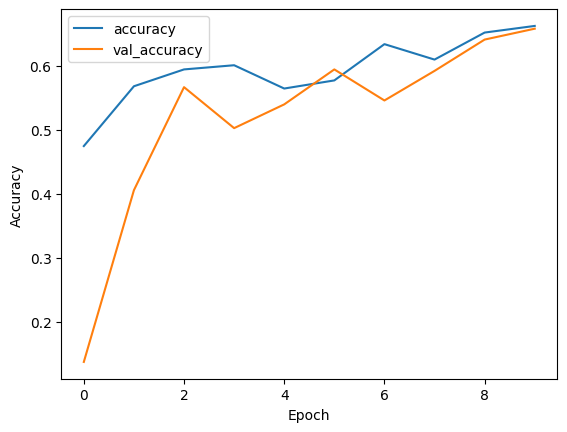

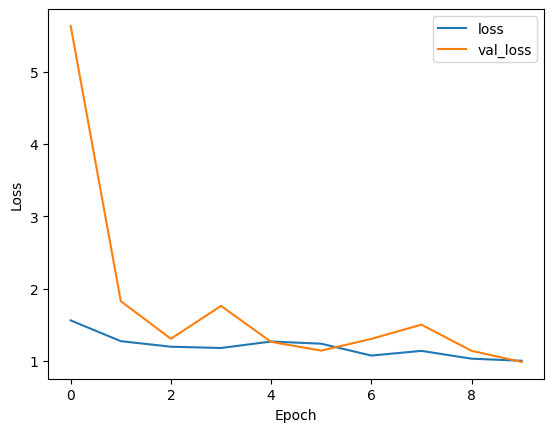

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
# Make predictions
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(test_labels, y_pred))

312/312 ━━━━━━━━━━━━━━━━━━━━ 28s 83ms/step
              precision    recall  f1-score   support

           0       0.71      0.50      0.59       939
           1       0.81      0.58      0.68      1018
           2       0.56      0.34      0.42       984
           3       0.52      0.26      0.35      1001
           4       0.39      0.57      0.47      1009
           5       0.67      0.28      0.39      1022
           6       0.43      0.78      0.55      1000
           7       0.65      0.60      0.62       981
           8       0.63      0.79      0.70       984
           9       0.52      0.82      0.63      1018

    accuracy                           0.55      9956
   macro avg       0.59      0.55      0.54      9956
weighted avg       0.59      0.55      0.54      9956



In [28]:
params = model.count_params()
print('Number of parameters in the model:', params)

start_time = time.time()
model.predict(x_test)
end_time = time.time()
inference_time = end_time - start_time
print('Inference time for CIFAR-10:', inference_time)

start_time = time.time()
model.predict(test_images)
end_time = time.time()
inference_time = end_time - start_time
print('Inference time for task_2:', inference_time)

Number of parameters in the model: 23851274


313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step
Inference time for CIFAR-10: 25.2234947681427
312/312 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step
Inference time for task_2: 26.167398691177368


# Evaluation

## AUC-ROC

In [29]:
import time
from sklearn.metrics import roc_auc_score

# Calculate the AUC-ROC for the Custom CNN model
print('AUC-ROC for Custom CNN:', cnn_roc_auc)

# Calculate the AUC-ROC for the Transfer Learning model
y_pred = model.predict(test_images) 
resnet_roc_auc = roc_auc_score(test_labels, y_pred, multi_class='ovr')
print('AUC-ROC for Transfer Learning model:', resnet_roc_auc)



AUC-ROC for Custom CNN: 0.9888389222222222


312/312 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step
AUC-ROC for Transfer Learning model: 0.9084094725518591


## Model Size

In [30]:
print('Number of params in CNN model', cnn_params)
print('Number of params in Transfer Learning model', params)

Number of params in CNN model 552874
Number of params in Transfer Learning model 23851274


## Inference Speed

In [31]:
print('Inference time for CNN model:', cnn_inference_time)
print('Inference time for Transfer Learning model:', inference_time)

Inference time for CNN model: 6.500978708267212
Inference time for Transfer Learning model: 26.167398691177368
